# Step 1: Import necessary libraries and load the dataset:

In [57]:
import pandas as pd

df = pd.read_excel("/content/gender-equlity.xlsx")


# Step 2: Select relevant features and target variable:

In [58]:
features = df[['Participation', 'Segregation and quality of work', 'Financial resources', 'Economic situation',
               'Attainment and participation', 'Segregation', 'Care activities', 'Social activities',
               'Political', 'Economic', 'Social', 'Status', 'Behaviour', 'Access']]

target = df['Gender Equality Index']


# Step 3: Split the data into training and testing sets:

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Step 4: Initialize and train the linear regression model:

Training R^2 Score: 0.9995989036693392
Testing R^2 Score: 0.993058190670885


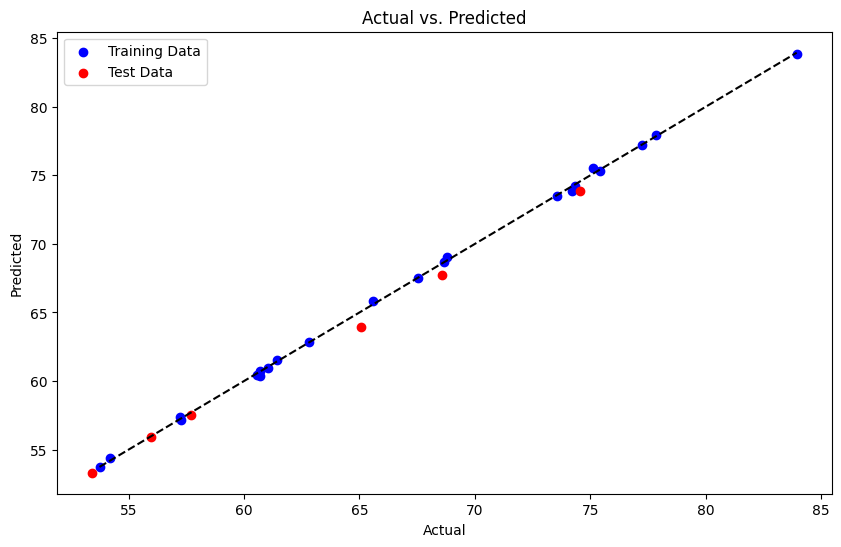

In [60]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)

# Plotting actual vs. predicted values
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

# Plotting training data
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')

# Plotting test data
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')

# Plotting the diagonal line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## Other Representations

### Histograms:

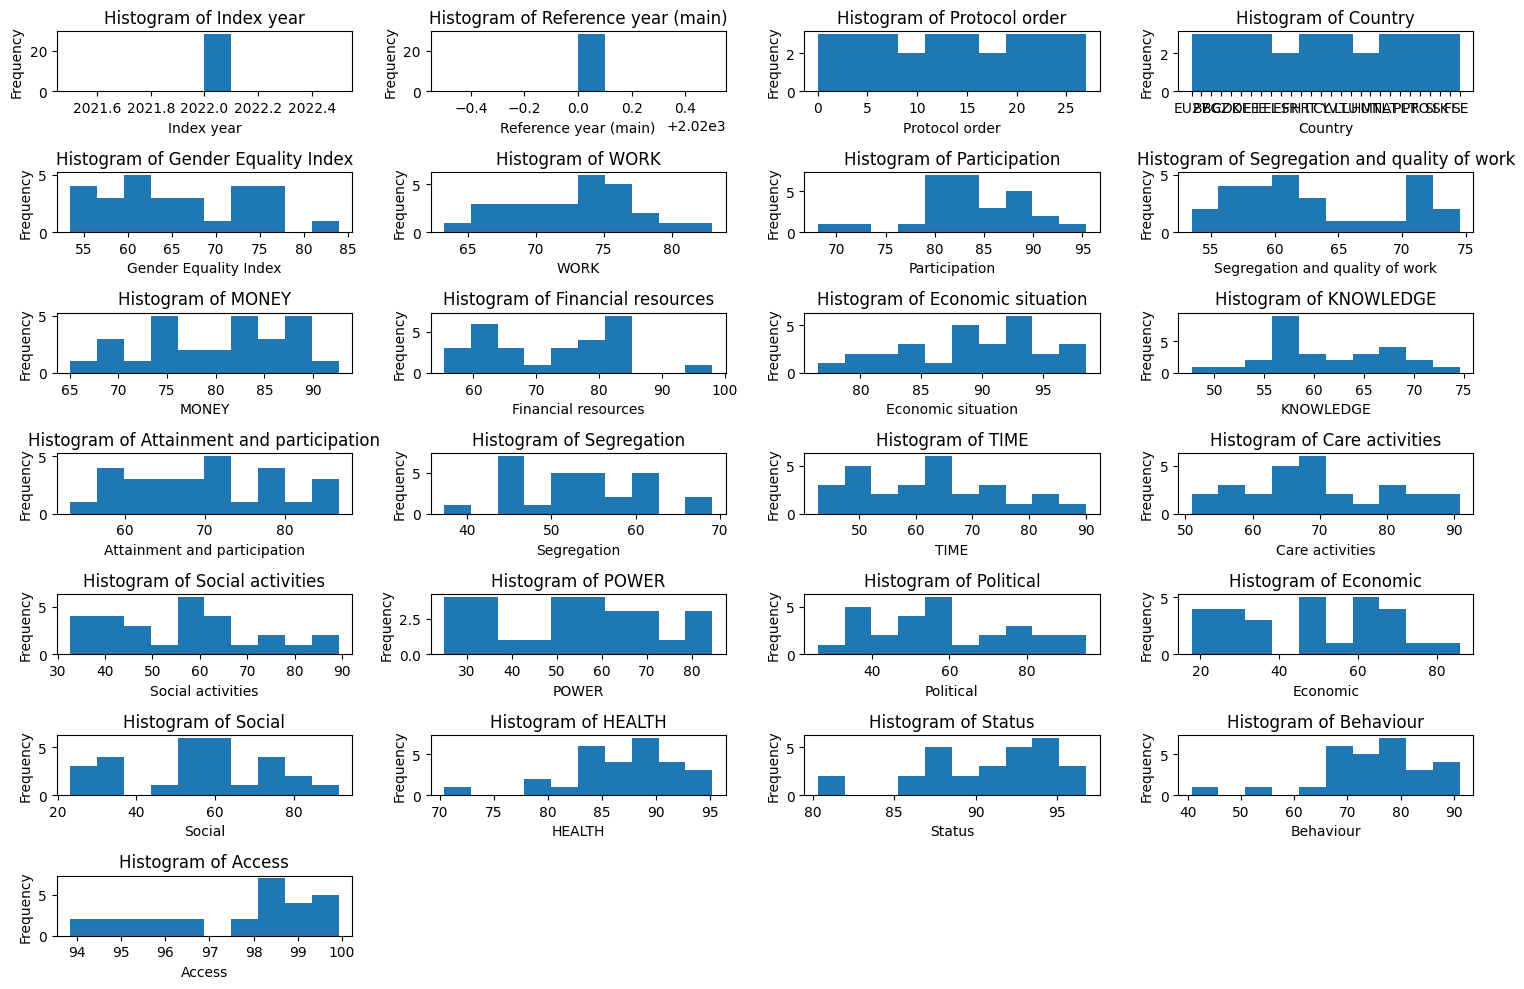

In [62]:
import matplotlib.pyplot as plt

num_columns = 4
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[column], bins=10)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

for j in range(len(df.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

### Box Plots:

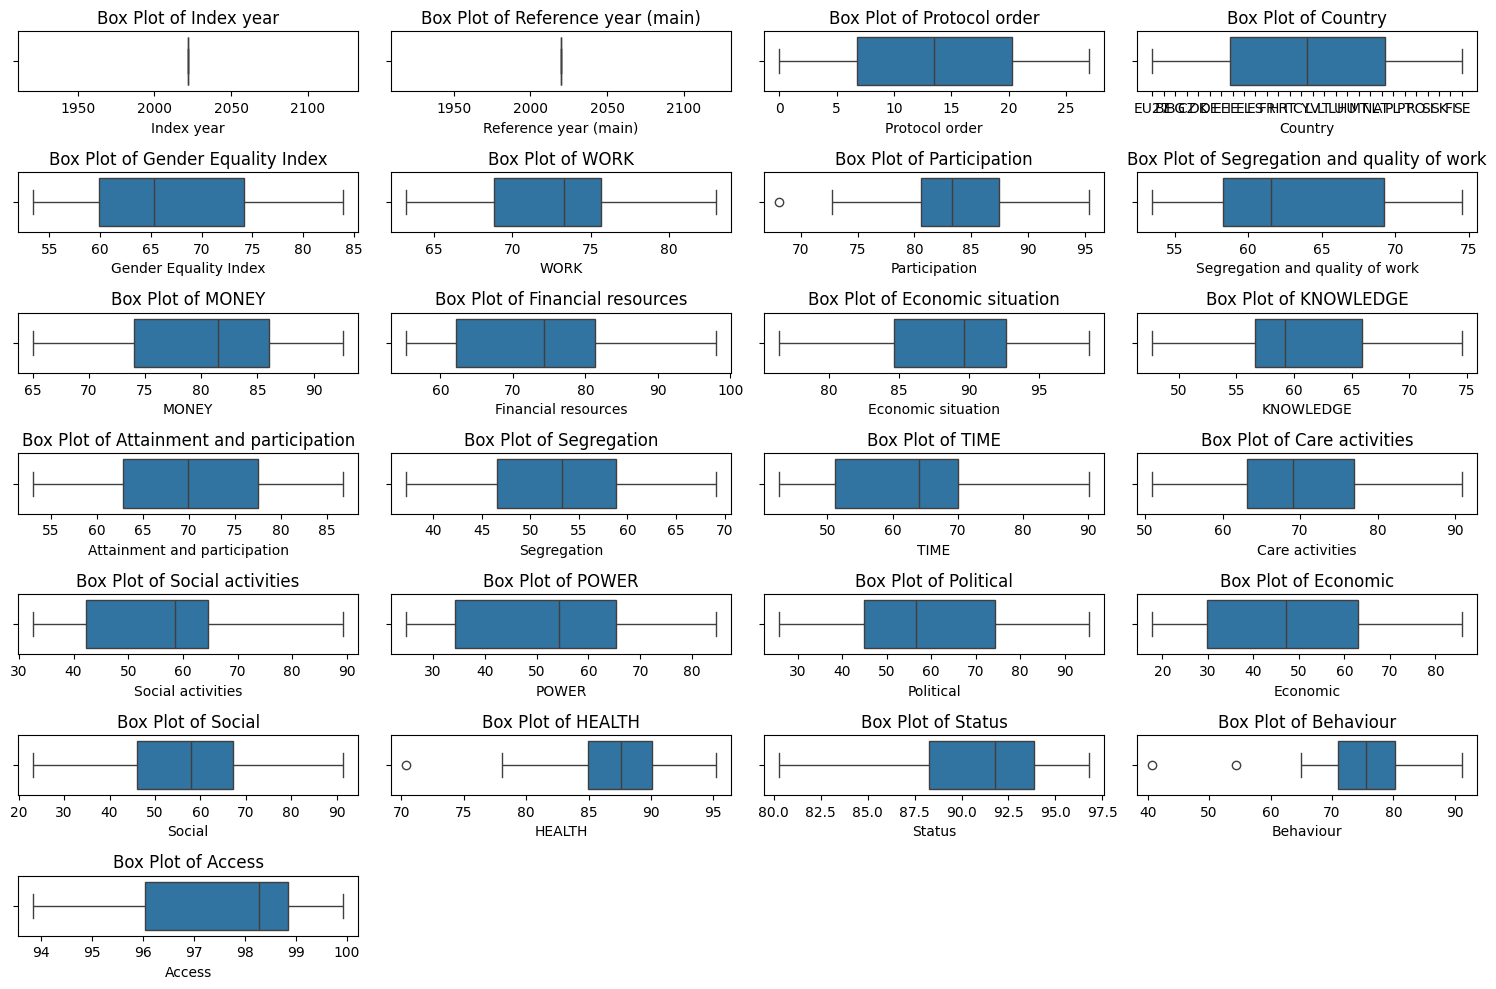

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = 4
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.boxplot(x=column, data=df, ax=ax)
    ax.set_xlabel(column)
    ax.set_title(f'Box Plot of {column}')

for j in range(len(df.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

### Scatter Plots:

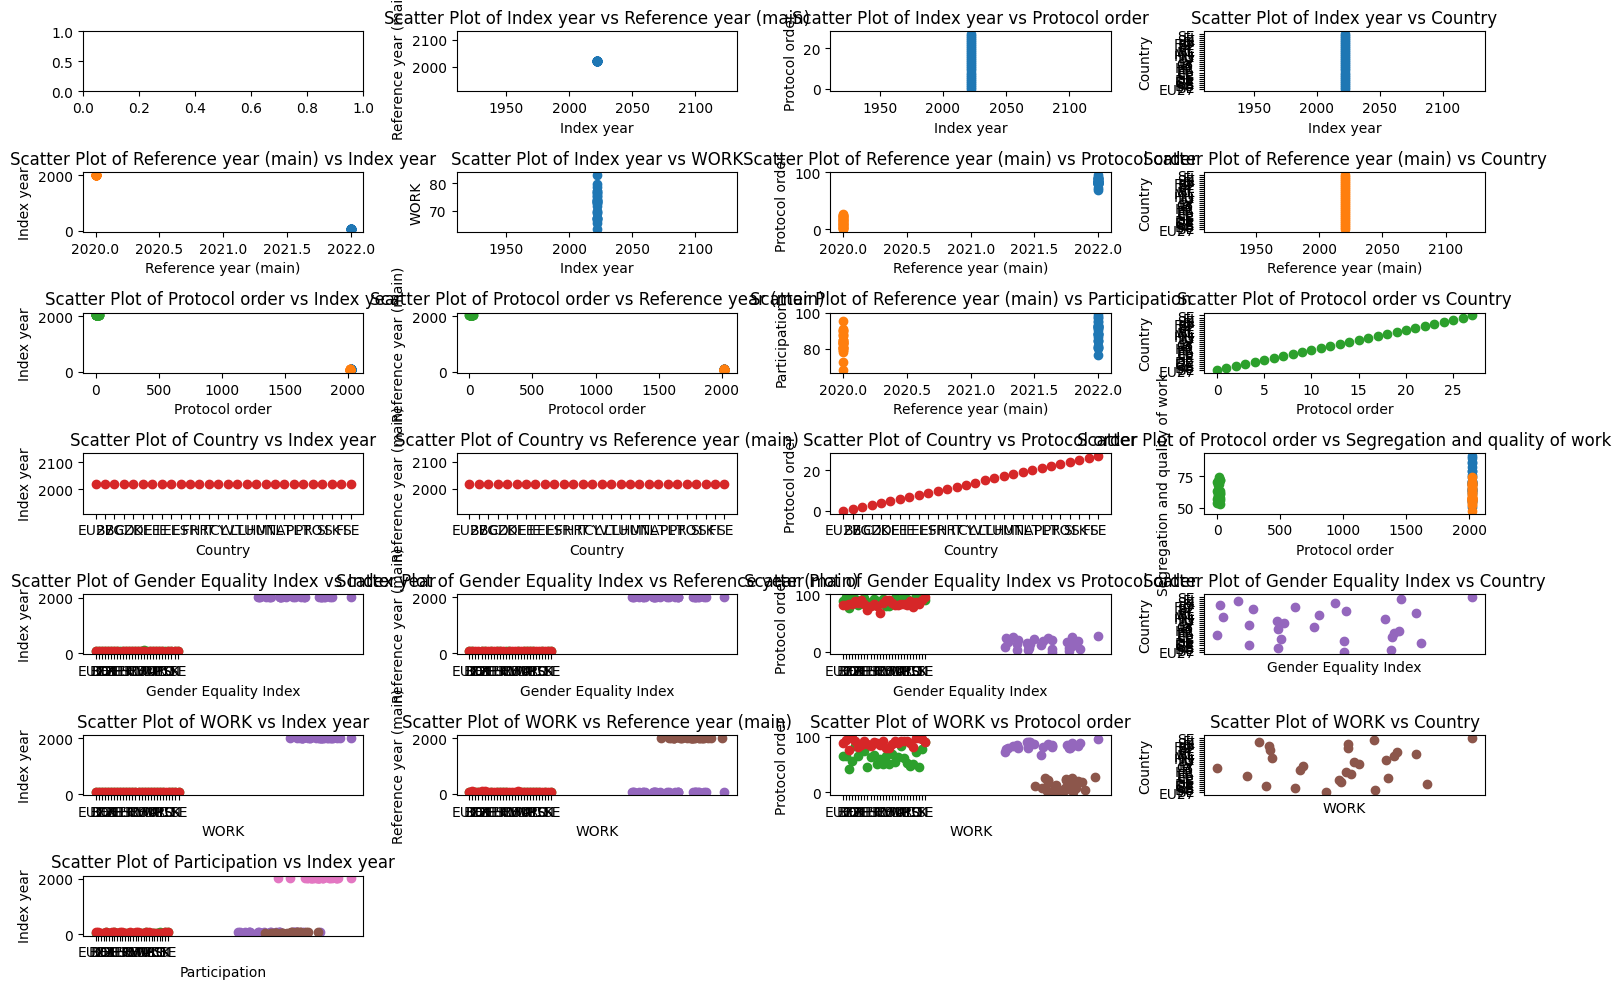

In [64]:
import matplotlib.pyplot as plt

num_columns = 4
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, feature1 in enumerate(df.columns):
    for j, feature2 in enumerate(df.columns):
        if i * num_columns + j < len(df.columns):
            ax = axes[i * num_columns + j]
            if feature1 != feature2:
                ax.scatter(df[feature1], df[feature2])
                ax.set_xlabel(feature1)
                ax.set_ylabel(feature2)
                ax.set_title(f'Scatter Plot of {feature1} vs {feature2}')
        else:
            break

for k in range(len(df.columns), num_rows * num_columns):
    axes[k].axis('off')

plt.tight_layout()

plt.show()

### Bar Charts:

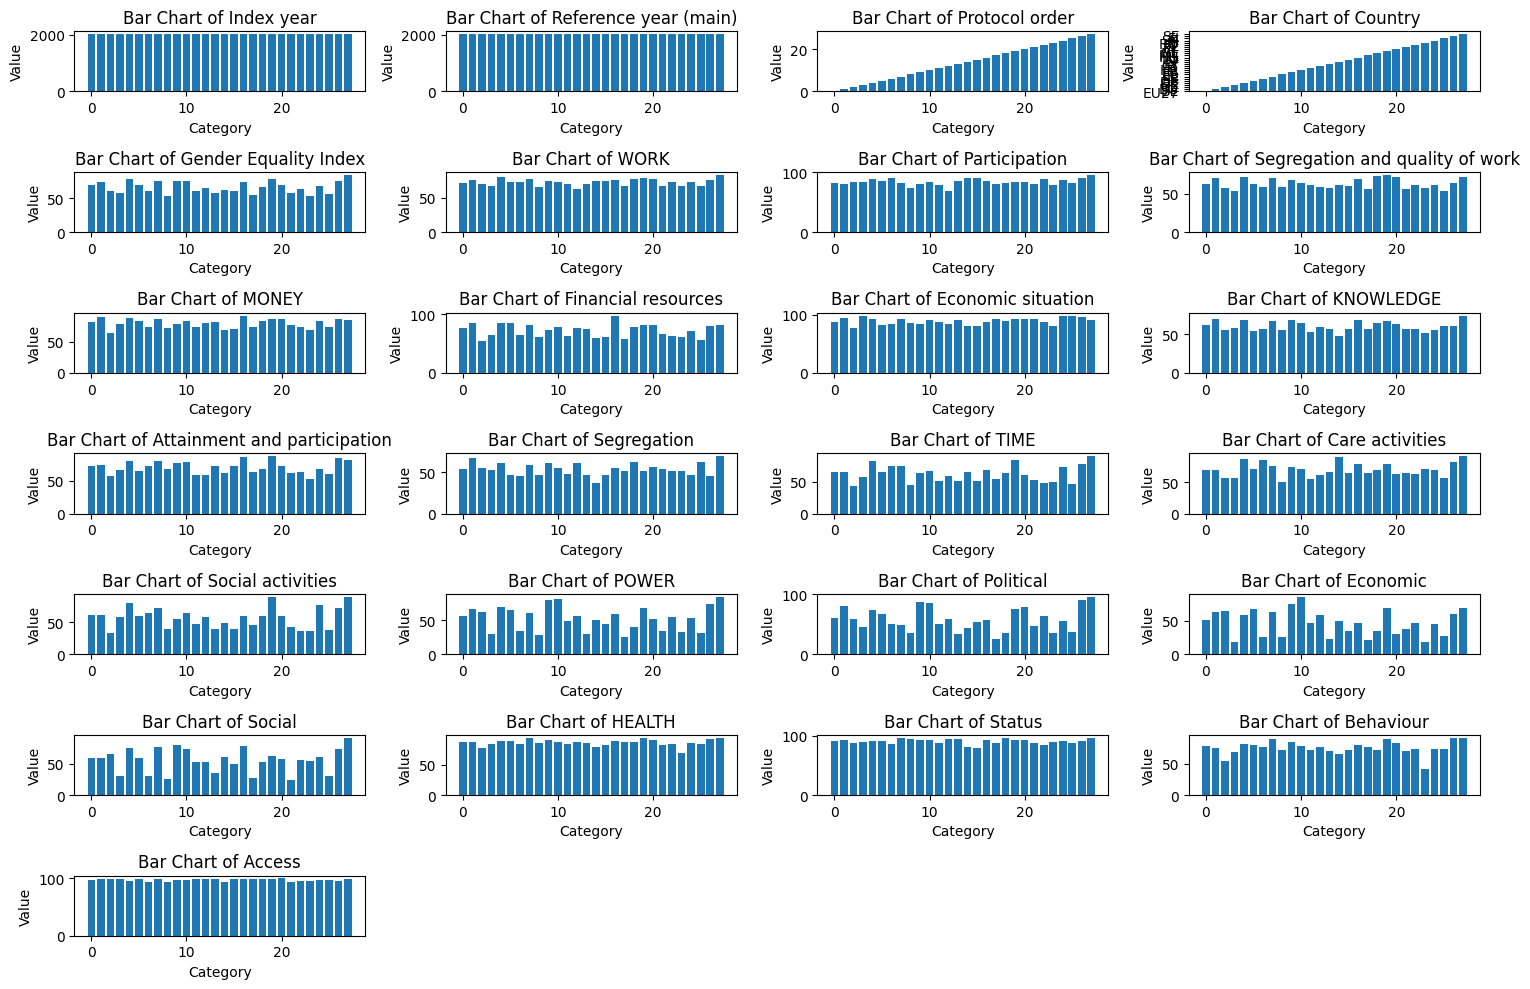

In [65]:
import matplotlib.pyplot as plt

num_columns = 4
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.bar(df.index, df[column])
    ax.set_xlabel('Category')
    ax.set_ylabel('Value')
    ax.set_title(f'Bar Chart of {column}')

for j in range(len(df.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

### Heatmaps:

<ipython-input-66-9b550255018c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


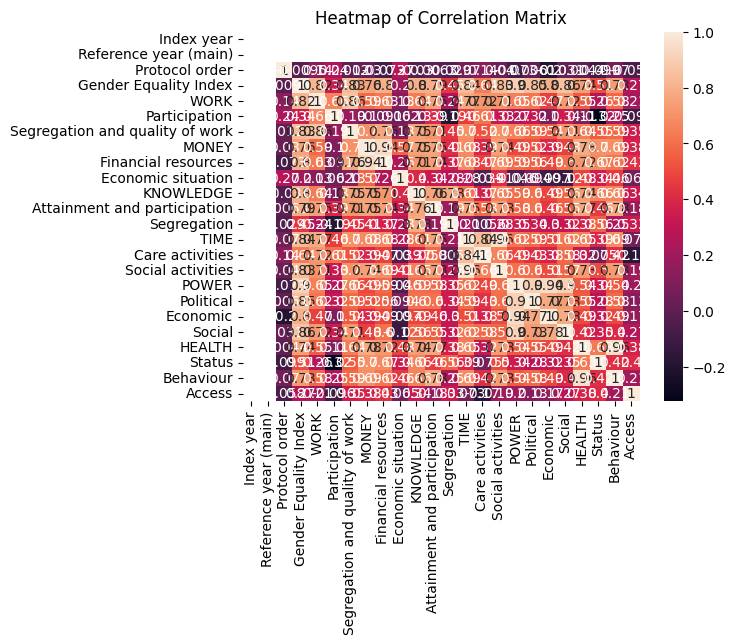

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


### Line Plots:

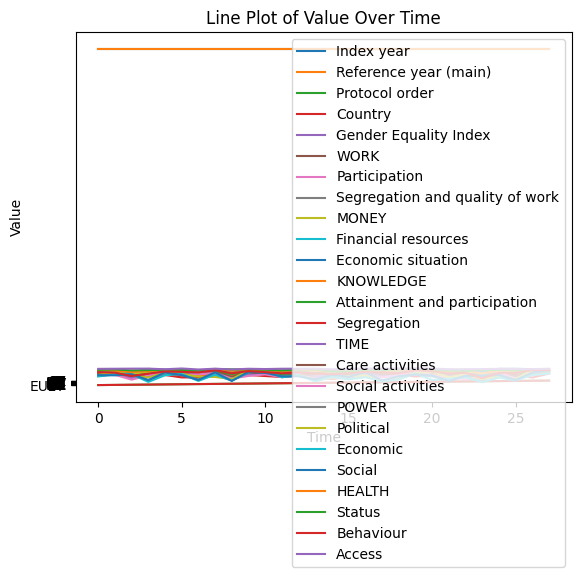

In [67]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot of Value Over Time')
plt.legend()
plt.show()


### Area Plots:

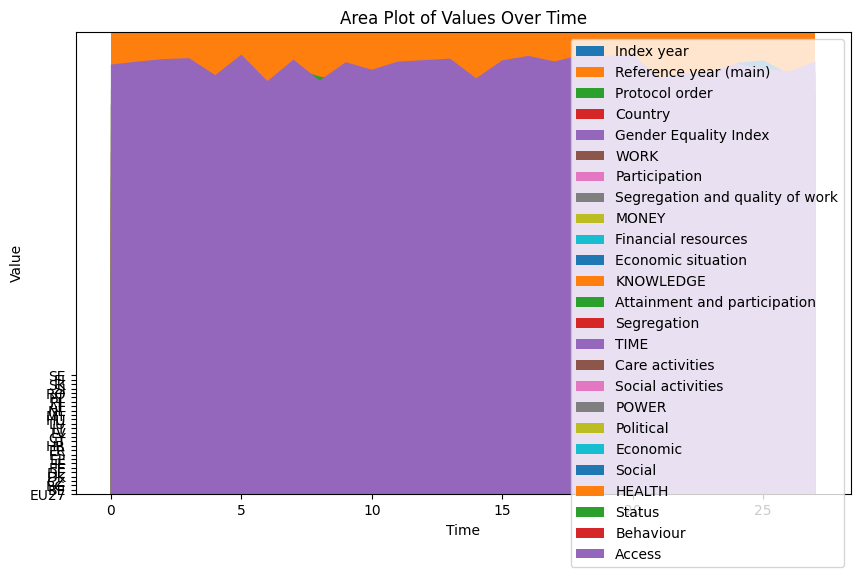

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.stackplot(df.index, df[column], labels=[column])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Area Plot of Values Over Time')
plt.legend()
plt.show()


In [69]:
!pip install squarify

### Treemaps:

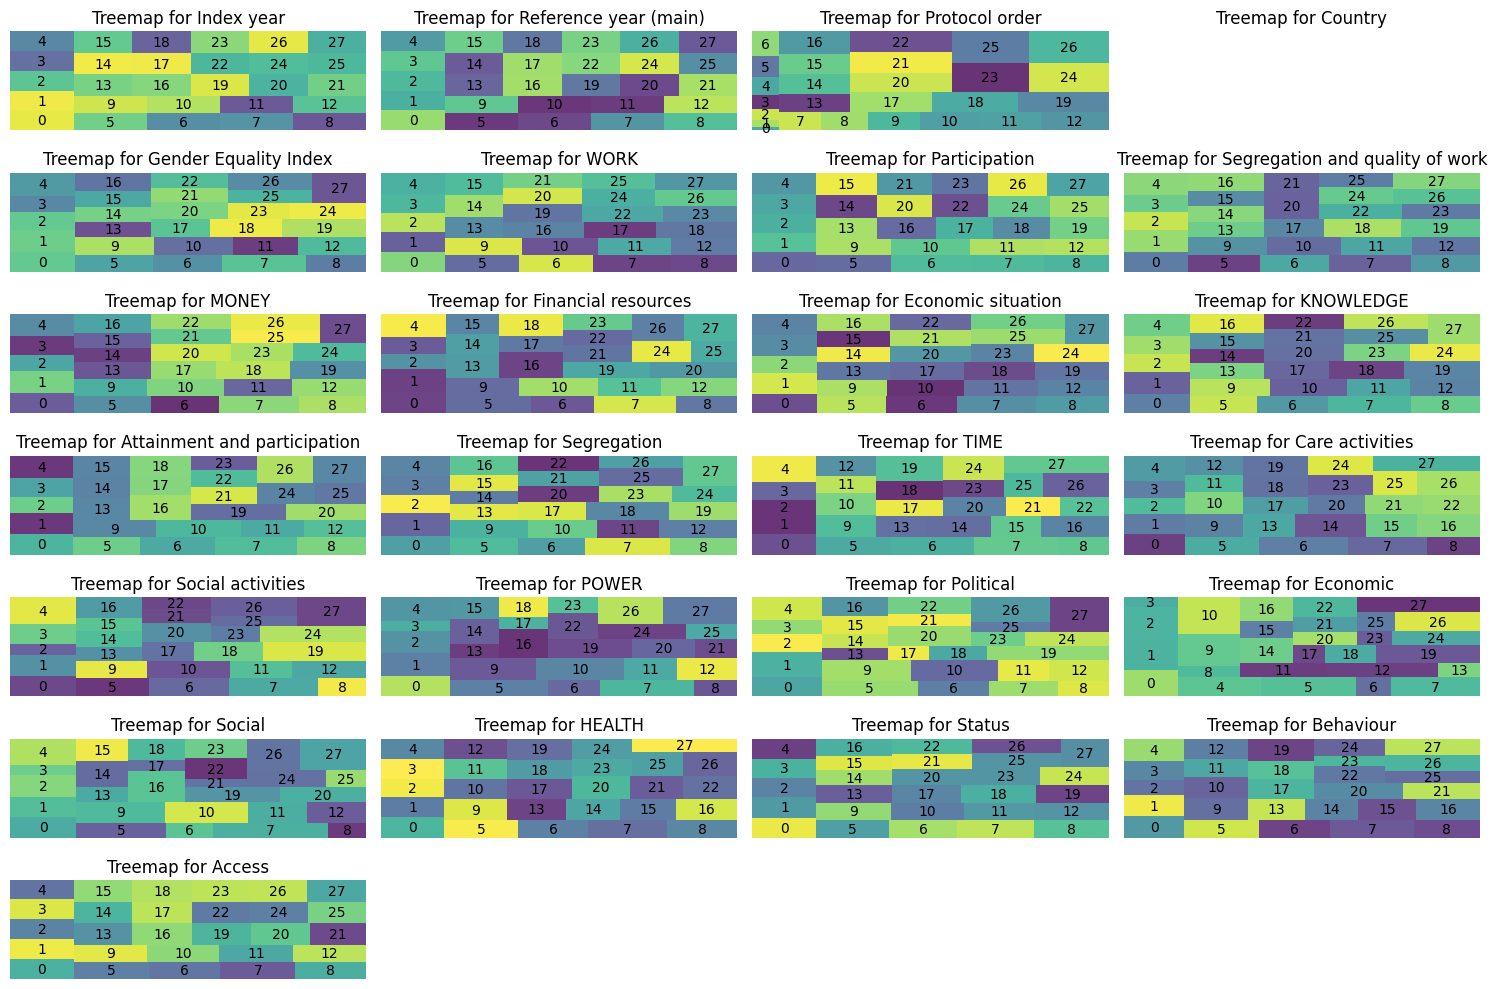

In [70]:
import squarify
import matplotlib.pyplot as plt

num_columns = 4
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sizes = df[column]
    sizes = pd.to_numeric(sizes, errors='coerce')
    sizes = sizes.dropna()
    sizes = sizes[sizes != 0]

    labels = df.index[:len(sizes)]

    squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=axes[i])
    axes[i].set_title(f'Treemap for {column}')
    axes[i].axis('off')

for j in range(len(df.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()

plt.show()


# Step 5: Create a function to predict gender equality for unseen instances:

In [13]:
def predict_gender_equality(participation, segregation_quality, financial_resources, economic_situation,
                            attainment_participation, segregation, care_activities, social_activities,
                            political, economic, social, status, behaviour, access):

    new_instance = pd.DataFrame([[participation, segregation_quality, financial_resources, economic_situation,
                                   attainment_participation, segregation, care_activities, social_activities,
                                   political, economic, social, status, behaviour, access]],
                                 columns=['Participation', 'Segregation and quality of work', 'Financial resources',
                                          'Economic situation', 'Attainment and participation', 'Segregation',
                                          'Care activities', 'Social activities', 'Political', 'Economic', 'Social',
                                          'Status', 'Behaviour', 'Access'])

    predicted_gender_equality = model.predict(new_instance)
    return predicted_gender_equality

# Step 6: Test the model for an unseen instance:

'Participation', 'Segregation and quality of work', 'Financial resources', 'Economic situation','Attainment and participation', 'Segregation', 'Care activities', 'Social activities','Political', 'Economic', 'Social', 'Status', 'Behaviour', 'Access'


In [10]:
unseen_instance_features = [0.6, 0.4, 0.7, 0.5, 0.8, 0.3, 0.5, 0.6, 0.4, 0.7, 0.5, 0.8, 0.3, 0.6]

predicted_gender_equality = predict_gender_equality(*unseen_instance_features)

print("Predicted Gender Equality Index:", predicted_gender_equality)


Predicted Gender Equality Index: [11.85952657]


# Comparisons

Linear Regression:
  Training R^2 Score: 0.9995989036693392
  Testing R^2 Score: 0.993058190670885
  Mean Squared Error: 0.3897634503153191

Decision Tree:
  Training R^2 Score: 1.0
  Testing R^2 Score: 0.5695720153169044
  Mean Squared Error: 24.167344343314145

Random Forest:
  Training R^2 Score: 0.9734614728103018
  Testing R^2 Score: 0.8151747524571897
  Mean Squared Error: 10.377427954629916

Support Vector Machine:
  Training R^2 Score: 0.6282085345302745
  Testing R^2 Score: 0.48880298970664693
  Mean Squared Error: 28.702302393577067

K-Nearest Neighbors:
  Training R^2 Score: 0.9221306141555102
  Testing R^2 Score: 0.9028481535504604
  Mean Squared Error: 5.4548082612784965



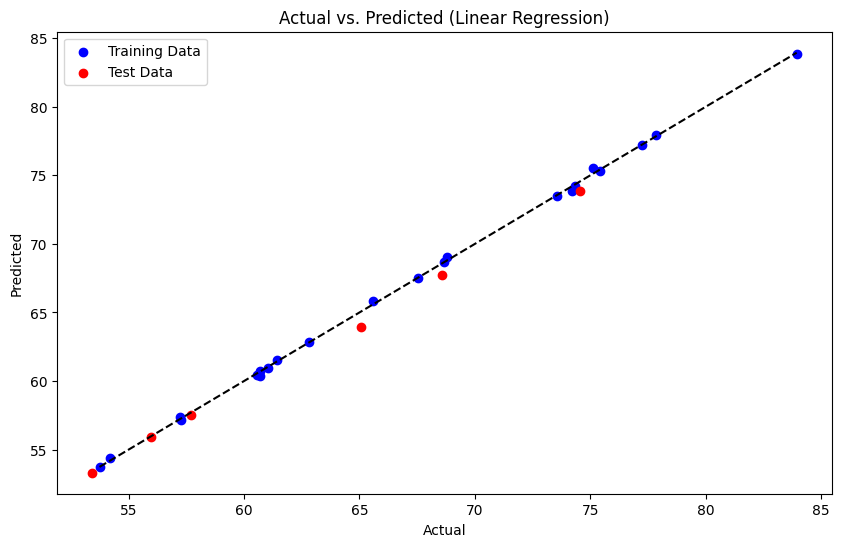

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize other models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}:")
    print("  Training R^2 Score:", train_score)
    print("  Testing R^2 Score:", test_score)
    print("  Mean Squared Error:", mse)
    print()

# Plotting actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.legend()
plt.show()
